# Follow the Snake

Let's get the data from our github repo. The data relevant for this challenge is in the folder `data-puzzles-assets/computervision/snakes/`



In [1]:
#!git clone https://github.com/hyperc54/data-puzzles-assets.git

In [2]:
CHALLENGE_DIR = 'C:/Users/iwimme/Documents/data-puzzles/Data-Puzzles/Follow-The-Snake/data-puzzles-assets/computervision/snakes/'

Will you find the name of the snake?

In [3]:
import cv2

In [4]:
cv2.__version__

'4.5.2'

In [5]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(CHALLENGE_DIR) if isfile(join(CHALLENGE_DIR, f)) and f != 'snake.png']

In [6]:
# recognizer = cv2.face.LBPHFaceRecognizer_create()
method = cv2.TM_SQDIFF_NORMED

# Read the images from the file
small_image = cv2.imread(CHALLENGE_DIR + "snake.png")
template = cv2.cvtColor(small_image, cv2.COLOR_BGR2GRAY)
directions = []

for file in onlyfiles:
    large_image = cv2.imread(CHALLENGE_DIR + file)
    large = cv2.cvtColor(large_image, cv2.COLOR_BGR2GRAY)


    # result = cv2.matchTemplate(large_image, small_image, method)
    result = cv2.matchTemplate(large, template, method)

    # # We want the minimum squared difference
    mn,_,mnLoc,_ = cv2.minMaxLoc(result)

    # # Draw the rectangle:
    # # Extract the coordinates of our best match
    MPx,MPy = mnLoc

    # # Step 2: Get the size of the template. This is the same size as the match.
    trows,tcols = small_image.shape[:2]

    # # Step 3: Draw the rectangle on large_image
    cv2.rectangle(large_image, (MPx,MPy),(MPx+tcols,MPy+trows),(0,0,255),2)

    # # Display the original image with the rectangle around the match.
    cv2.imshow('output',large_image)

    # # The image is only displayed if we call this
    directions.append(mnLoc)
    cv2.waitKey(100)

In [9]:
N = (10, 12)
S = (82, 12)
E = (82, 84)
W = (10, 84)

In [15]:
import matplotlib.pyplot as plt

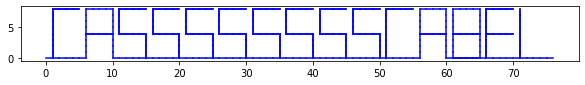

In [31]:
plt.figure(figsize=(10,1))
vert = 0
hor = 0
last_vert = 0
last_hor = 0

for d in directions:
    if d == N:
        vert += 1
    elif d == S:
        vert -= 1
    elif d == E:
        hor += 1
    elif d == W:
        hor -= 1
    plt.plot((last_hor,hor), (last_vert,vert), 'b')
#     print(last_vert - vert, last_hor - hor)
    last_vert = vert
    last_hor = hor